In [2]:
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 # twitter App access keys for @user
    # Please cerate a developer account on twitter and fill the following keys.
# Consumer
CONSUMER_KEY = "b5r6cvlG24p5edN4oOYQTEPZ8"
CONSUMER_SECRET = "pu2SdCyvpHHUihYiPgSq0k3VZSWWDI6jB5VEeVzoLykFysqaZi"

# Access:
ACCESS_TOKEN = "1645407349-X6FA5dPAbu6QUeLyLp9ThCwXGvj2NU5yqbot23Q"
ACCESS_SECRET = "3wEOxOoaohmmrtyUh4p29zP1x8ciMrI6goHHaJrExGAz3"

In [4]:
# We import our access keys:

def twitter_setup():
    
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

In [5]:
extractor = twitter_setup()

In [10]:

alltweets=[]
#tweets = extractor.user_timeline(screen_name="ESPNcricinfo", count =500, tweet_mode='extended')
tweets = extractor.search(q="#loksabha", count =300, tweet_mode='extended')
alltweets.extend(tweets)
oldest = alltweets[-1].id - 1
new_tweets=tweets

while len(new_tweets) > 0 and len(alltweets)<500:
		print("getting tweets before %s" % (oldest))
		
		#all subsiquent requests use the max_id param to prevent duplicates
		new_tweets = extractor.search(q="#loksabha", count =300, tweet_mode='extended',max_id=oldest)
		
		#save most recent tweets
		alltweets.extend(new_tweets)
		
		#update the id of the oldest tweet less one
		oldest = alltweets[-1].id - 1
		
		print("...%s tweets downloaded so far" % (len(alltweets)))
tweets=alltweets
print("number of tweets extracted: {}.\n".format(len(tweets)))
 


getting tweets before 1113720114254241792
...188 tweets downloaded so far
getting tweets before 1113682863600427007
...266 tweets downloaded so far
getting tweets before 1113590863077056512
...357 tweets downloaded so far
getting tweets before 1113456980025155584
...445 tweets downloaded so far
getting tweets before 1113418868284809215
...545 tweets downloaded so far
number of tweets extracted: 545.



In [11]:
print("number of tweets extracted: {}.\n".format(len(tweets)))
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.full_text)
    print("_______________________________________________")

number of tweets extracted: 545.

5 recent tweets:

RT @MahaBharat2019: #PappuPinkyInKerala

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla…
_______________________________________________
#PappuPinkyInKerala

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla 

They have more Muslim voters than #Wayanad.

Nehru gave #Article370 to Kashmir &amp; Rahul should check acceptability among his own Muslim community in #Kashmir https://t.co/ymcy04hybj
_______________________________________________
#Loksabha चुनाव के बाद BSNL सरकारी कंपनी के 54 हजार कर्मचारियों की जा सकती है नौकरी
_______________________________________________
मंदिर या मस्जिद पर लाउडस्पीकर लगाने के लिए लोकल थाने से मंज़ूरी लेनी पड़ती है.

और इसी देश में एक राष्ट्रीय चैनल #NamoTV बिना किसी मंज़ूरी या लाइसेंस के ऑन एयर हो गया है.

वैसे उत्तर कोरिया में भी ऐसे टीवी चैनल हैं जिन पर चौबीस घंटे किम जोंग उन ही दिखाई देते हैं.

#LokSabha

In [12]:
data = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['tweets'])

In [13]:
display(data.head(10))

,tweets
0,RT @MahaBharat2019: #PappuPinkyInKerala\n\nWhy...
1,#PappuPinkyInKerala\n\nWhy #RahulGandhi is not...
2,#Loksabha चुनाव के बाद BSNL सरकारी कंपनी के 54...
3,मंदिर या मस्जिद पर लाउडस्पीकर लगाने के लिए लोक...
4,RT @MahaBharat2019: #BhagodaRahul\n\nWhy #Rahu...
5,PRIYANKA ACCOMPANIES RAHUL GANDHI IN WAYANAD T...
6,RT @DrAditya_IITBHU: क्या मुस्लिम-क्रिश्चियन (...
7,"After filling nomination, Congress president R..."
8,RT @shewale_rahul: Received suggestions and va...
9,RT @shewale_rahul: Received suggestions and va...


In [14]:
for i in data.tweets[0:10]:
    print(i)

RT @MahaBharat2019: #PappuPinkyInKerala

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla…
#PappuPinkyInKerala

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla 

They have more Muslim voters than #Wayanad.

Nehru gave #Article370 to Kashmir &amp; Rahul should check acceptability among his own Muslim community in #Kashmir https://t.co/ymcy04hybj
#Loksabha चुनाव के बाद BSNL सरकारी कंपनी के 54 हजार कर्मचारियों की जा सकती है नौकरी
मंदिर या मस्जिद पर लाउडस्पीकर लगाने के लिए लोकल थाने से मंज़ूरी लेनी पड़ती है.

और इसी देश में एक राष्ट्रीय चैनल #NamoTV बिना किसी मंज़ूरी या लाइसेंस के ऑन एयर हो गया है.

वैसे उत्तर कोरिया में भी ऐसे टीवी चैनल हैं जिन पर चौबीस घंटे किम जोंग उन ही दिखाई देते हैं.

#LokSabha
RT @MahaBharat2019: #BhagodaRahul

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla 

They…
PRIYANKA ACCOMPANIES RAHUL GANDHI IN WAYANAD TO FILE N

In [15]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1113755541191282688
2019-04-04 10:49:48
Twitter for Android
0
1
None
None
{'hashtags': [{'text': 'PappuPinkyInKerala', 'indices': [20, 39]}, {'text': 'RahulGandhi', 'indices': [45, 57]}, {'text': 'Kashmir', 'indices': [81, 89]}, {'text': 'LokSabha', 'indices': [90, 99]}], 'symbols': [], 'user_mentions': [{'screen_name': 'MahaBharat2019', 'name': '@MahaBharat2019', 'id': 253687000, 'id_str': '253687000', 'indices': [3, 18]}], 'urls': []}


In [16]:
data['len'] = np.array([len(tweet.full_text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [17]:
data

,tweets,len,ID,Date,Source,Likes,RTs
0,RT @MahaBharat2019: #PappuPinkyInKerala\n\nWhy...,139,1113755541191282688,2019-04-04 10:49:48,Twitter for Android,0,1
1,#PappuPinkyInKerala\n\nWhy #RahulGandhi is not...,305,1113755227348320256,2019-04-04 10:48:33,Twitter for Android,1,1
2,#Loksabha चुनाव के बाद BSNL सरकारी कंपनी के 54...,83,1113755036843220992,2019-04-04 10:47:48,Facebook,0,0
3,मंदिर या मस्जिद पर लाउडस्पीकर लगाने के लिए लोक...,274,1113754172950708226,2019-04-04 10:44:22,Twitter for Android,0,0
4,RT @MahaBharat2019: #BhagodaRahul\n\nWhy #Rahu...,140,1113754030155517953,2019-04-04 10:43:47,Twitter for Android,0,4
5,PRIYANKA ACCOMPANIES RAHUL GANDHI IN WAYANAD T...,202,1113753376213340161,2019-04-04 10:41:12,Facebook,0,0
6,RT @DrAditya_IITBHU: क्या मुस्लिम-क्रिश्चियन (...,140,1113753161922154496,2019-04-04 10:40:20,Twitter for Android,0,2
7,"After filling nomination, Congress president R...",219,1113753074751819776,2019-04-04 10:40:00,TweetDeck,2,0
8,RT @shewale_rahul: Received suggestions and va...,138,1113752611205808128,2019-04-04 10:38:09,Twitter Web Client,0,4
9,RT @shewale_rahul: Received suggestions and va...,138,1113752422050975744,2019-04-04 10:37:24,Twitter for Android,0,4


In [14]:
data.tweets.iloc[585]

IndexError: single positional indexer is out-of-bounds

In [18]:

# Visualization and basic stats
# We extract the mean of length
 
mean = np.mean(data['len'])
print("the length's average in tweets: {}".format(mean))

the length's average in tweets: 167.94495412844037


In [19]:

# We extract the tweet with more FAVs and mote RTs:
 
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])
 
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]
 
# Max FAVs:
print("the tweet with more likes is: \n{}".format(data['tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} character.\n".format(data['len'][fav]))
print("______________________________________")
# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} character.\n".format(data['len'][rt]))

the tweet with more likes is: 
...अविरत जन'कल्याण'!
स्कायवॉक केला...
कल्याण पूर्व स्थानकापर्यंत थेट मार्ग उपलब्ध झाला

#LokSabhaElections2019 #KalyanLokSabha #ShivSena #Loksabha #Kalyan
 #JanKalyan
@ShivSena @BJP4India @BJP4Maharashtra https://t.co/rsObOWDK5E
Number of likes: 48
228 character.

______________________________________
The tweet with more retweets is: 
RT @PriyaDutt_INC: Alone we can do so little; together we can do so much. Visited different areas in Santacruz (w) on 27th March and I’m ov…
Number of retweets: 432
140 character.



In [20]:
tlen = pd.Series(data = data['len'].values)   #, index=data['Data'])
tfav = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tret = pd.Series(data = data['RTs'].values) #, index=data['Data']

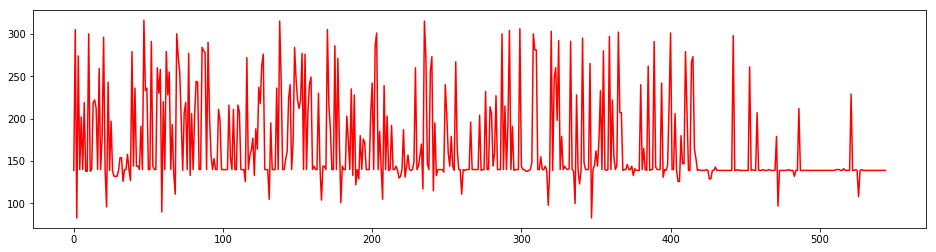

In [21]:
tlen.plot(figsize=(16,4), color='r', label="Length of tweets");

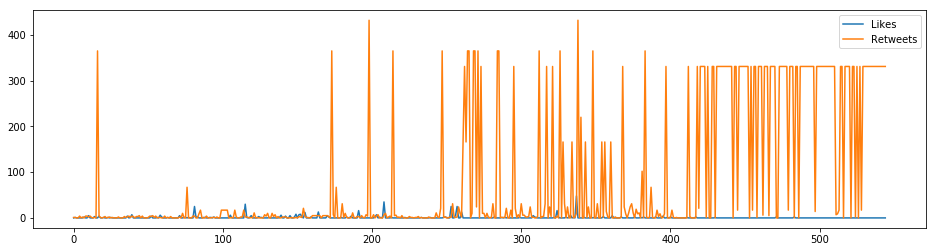

In [22]:

# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [23]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Facebook
* TweetDeck
* Twitter Web Client
* Twitter for iPhone
* GST latest
* Hootsuite Inc.
* Amstronics
* WordPress.com
* Twitter Web App
* Instagram
* Twitter for iPad
* Thoothukudi Bot
* current news 
* TwitterAppStudy01
* mybot11
* IFTTT
* ExistentialCrisisHotline
* Nashik feed1
* SmartPanvelBot
* WeArePanvel - Marathi
* Twitter Media Studio


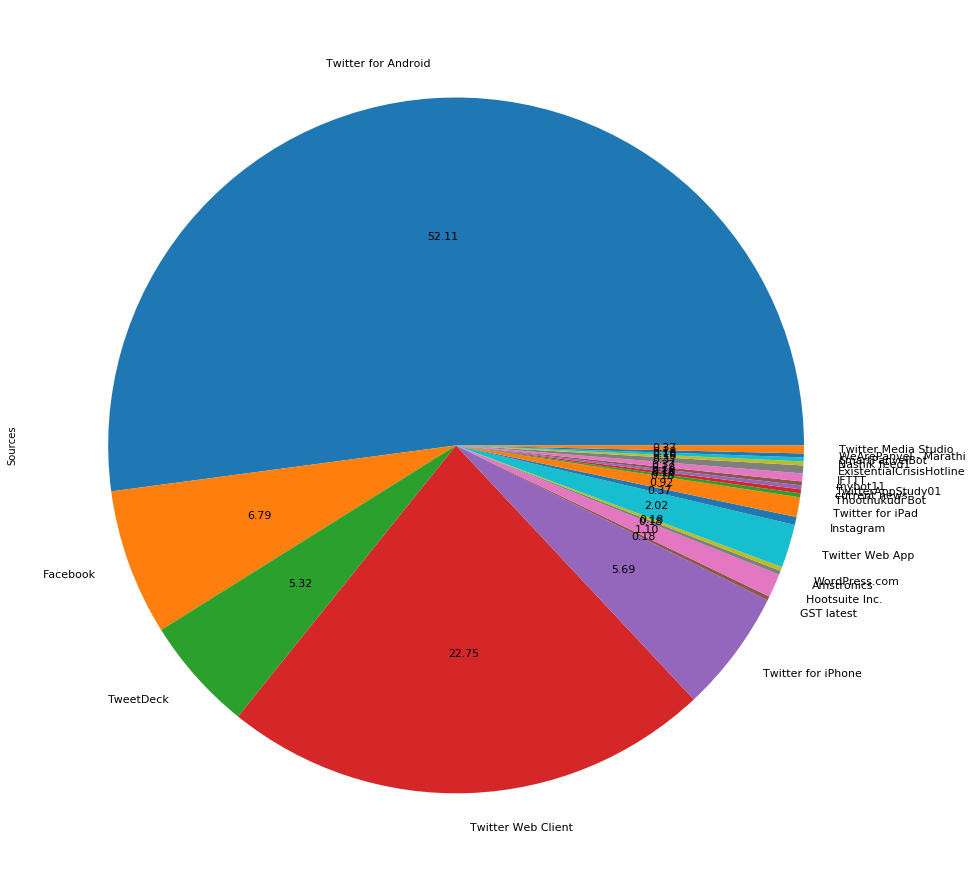

In [24]:

# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100

 
# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(16, 16));

In [26]:
from textblob import TextBlob
import re
 
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return str(1)
    elif analysis.sentiment.polarity == 0:
        return str(0)
    else:
        return str(-1)

In [27]:
data['SA']=[analize_sentiment(tw) for tw in data.tweets]


In [28]:
pos_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if int(data['SA'][index]) > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if int(data['SA'][index]) == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if int(data['SA'][index]) < 0]

In [29]:
# We print percentages:
 
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweets'])))

Percentage of positive tweets: 12.477064220183486%
Percentage of neutral tweets: 65.68807339449542%
Percentage de negative tweets: 21.834862385321102%


In [30]:
print("------5 negative tweets are:--------")
for i in neg_tweets[0:5]:
    print(i)
    print("______________________________________________")

------5 negative tweets are:--------
The Congress alleged that #PMNarendraModi "promoted" firms of his "capitalist friends" at the expense of state-owned BSNL and MTNL.

#ElectionsWithDC #LokSabhaElections2019 #LokSabha
https://t.co/3mQehmS2tV
______________________________________________
RT @DeccanChronicle: The BJP has topped the chart of political advertisers on #Google with an advertisement spent share of around 32 per ce…
______________________________________________
RT @DeccanChronicle: The BJP has topped the chart of political advertisers on #Google with an advertisement spent share of around 32 per ce…
______________________________________________
The BJP has topped the chart of political advertisers on #Google with an advertisement spent share of around 32 per cent, while its rival Congress is ranked sixth with a meagre 0.14 per cent share.

#ElectionsWithDC #LokSabhaElections2019 #LokSabha
https://t.co/YQK8wA6ttB
______________________________________________
Mr. @shaktisi

In [31]:
print("------ 5 positive  tweets are:--------")
for i in pos_tweets[0:5]:
    print(i)
    print("______________________________________________")

------ 5 positive  tweets are:--------
#PappuPinkyInKerala

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla 

They have more Muslim voters than #Wayanad.

Nehru gave #Article370 to Kashmir &amp; Rahul should check acceptability among his own Muslim community in #Kashmir https://t.co/ymcy04hybj
______________________________________________
PRIYANKA ACCOMPANIES RAHUL GANDHI IN WAYANAD TO FILE NOMINATION.
See more @ https://t.co/nAIdTabmco
#IndiaVoteKar #RahulGandhi #PriyankaGandhiVadra #LokSabha #Wayanad #Nomination https://t.co/nAIdTabmco
______________________________________________
#BhagodaRahul

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla 

They have more Muslim voters than #Wayanad.

Nehru gave #Article370 to Kashmir &amp; hence Rahul should check acceptability among his own Muslim community.

#Amethi
______________________________________________
KERALA CONSTITUENCY FACTBOOK™: 

In [32]:
print("------5 neutral  tweets are:--------")
for i in neu_tweets[0:5]:
    print(i)
    print("______________________________________________")

------5 neutral  tweets are:--------
RT @MahaBharat2019: #PappuPinkyInKerala

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla…
______________________________________________
#Loksabha चुनाव के बाद BSNL सरकारी कंपनी के 54 हजार कर्मचारियों की जा सकती है नौकरी
______________________________________________
मंदिर या मस्जिद पर लाउडस्पीकर लगाने के लिए लोकल थाने से मंज़ूरी लेनी पड़ती है.

और इसी देश में एक राष्ट्रीय चैनल #NamoTV बिना किसी मंज़ूरी या लाइसेंस के ऑन एयर हो गया है.

वैसे उत्तर कोरिया में भी ऐसे टीवी चैनल हैं जिन पर चौबीस घंटे किम जोंग उन ही दिखाई देते हैं.

#LokSabha
______________________________________________
RT @MahaBharat2019: #BhagodaRahul

Why #RahulGandhi is not contesting from #Kashmir
#LokSabha seats ?

Srinagar, Anantnag, Baramulla 

They…
______________________________________________
RT @DrAditya_IITBHU: क्या मुस्लिम-क्रिश्चियन (अल्पसंख्यक) के गठजोड़ की वजह से ही है वायनाड में राहुल गाँधी जी के जीत का संभावित शोर।

#